# Predicting employee turnover w/ Machine Learning Random Forest Model

Dataset: https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset

**Tasks:**
1. Import Packages
2. Load in Data
3. Data Wrangling
4. Train Test Split
5. Initial Random Forest Model
6. Evaluate Model Fit
7. Hyperparameter Tuning
8. Re-run Model
9. Run Feature Importance

In [1]:
#Import Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV

In [2]:
#Load in the Data
hr = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [3]:
hr.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
#View all columns in entirety
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

## Data Wrangling
1. View the values for each of the following columns:
 - BusinessTravel
 - Department
 - EducationField
 - StandardHours
 - Gender
 - Marital Status
 - OverTime
 - Job Roles

In [5]:
#View the values for each of the following columns:
hr.BusinessTravel.value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

In [6]:
hr.Department.value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [7]:
hr.StandardHours.value_counts()

80    1470
Name: StandardHours, dtype: int64

In [8]:
hr.EducationField.value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

In [9]:
hr.Gender.value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

In [10]:
hr.MaritalStatus.value_counts()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

In [11]:
hr.OverTime.value_counts()

No     1054
Yes     416
Name: OverTime, dtype: int64

In [12]:
hr.JobRole.value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

## Data Wrangling Continued.
1. Recode BusinessTravel, Department, Gender, Marital Status, OverTime & Job Roles into new columns (Dropping the originals)
2. Drop EducationField, Standard Hours, Over18
    - This will be done simultaneously while creating our x & y variables for the random forest model
    - Standard Hours only contains 1 value which won't have varying impact on the model

In [13]:
#Recoding Business Travel
def my_recode(series):
    if series == "Non-Travel":
        return 1
    if series == "Travel_Rarely":
        return 2
    if series == "Travel_Frequently":
        return 3


hr["BusinessTravelR"] = hr["BusinessTravel"].apply(my_recode)

In [14]:
#Recoding Department
def my_recode2(series):
    if series == "Human Resources":
        return 1
    if series == "Sales":
        return 2
    if series == "Research & Development":
        return 3
hr["DepartmentR"] = hr["Department"].apply(my_recode2)

In [15]:
#Recoding Gender
def my_recode3(series):
    if series == "Female":
        return 0
    if series == "Male":
        return 1


hr["GenderR"] = hr["Gender"].apply(my_recode3)

In [16]:
#Recoding Marital Status
def my_recode4(series):
    if series == "Divorced":
        return 1
    if series == "Single":
        return 2
    if series == "Married":
        return 3


hr["MaritalStatusR"] = hr["MaritalStatus"].apply(my_recode4)

In [17]:
#Recoding OverTime
def my_recode5(series):
    if series == "No":
        return 0
    if series == "Yes":
        return 1


hr["OverTimeR"] = hr["OverTime"].apply(my_recode5)

In [18]:
#Recoding Job Roles
def my_recode6(series):
    if series == "Human Resources":
        return 1
    if series == "Research Developer":
        return 2
    if series == "Sales Representative":
        return 3
    if series == "Manager":
        return 4
    if series == "Healthcare Representative":
        return 5
    if series == "Manufacturing Director":
        return 6
    if series == "Laboratory Technician":
        return 7
    if series == "Research Scientist":
        return 8
    if series == "Sales Executive":
        return 9

hr["JobRoleR"] = hr["JobRole"].apply(my_recode6)

In [19]:
hr.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravelR,DepartmentR,GenderR,MaritalStatusR,OverTimeR,JobRoleR
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,6,4,0,5,2,2,0,2,1,9.0
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,10,7,1,7,3,3,1,3,0,8.0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,0,0,0,0,2,3,1,2,1,7.0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,8,7,3,0,3,3,0,3,1,8.0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,2,2,2,2,2,3,1,3,0,7.0


In [20]:
hr.dropna(inplace = True)

In [21]:
#Data Wrangling
##Subset data into x and y for training model

x = hr.drop(["Attrition", "EducationField", "StandardHours", "DailyRate", "BusinessTravel", "Department", "Gender", "JobRole", "MaritalStatus", "Over18", "OverTime", "EmployeeNumber", "EmployeeCount"], axis = 1)
y = hr["Attrition"]

In [22]:
#Train Test Split
## Using 60/40 model for train/test
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.4, random_state=76)

In [23]:
#Initial Random Forest Model
forest = RandomForestClassifier(n_estimators=500, random_state=76)
forest.fit(x_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=76)

In [24]:
#Evaluate Model Fit
forestPredictions = forest.predict(x_test)
print(confusion_matrix(y_test, forestPredictions))
print(classification_report(y_test, forestPredictions))

[[447   8]
 [ 90  11]]
              precision    recall  f1-score   support

          No       0.83      0.98      0.90       455
         Yes       0.58      0.11      0.18       101

    accuracy                           0.82       556
   macro avg       0.71      0.55      0.54       556
weighted avg       0.79      0.82      0.77       556



In [25]:
#Our model is 82% accurate at predicting whether an employee with stay or leave, but is better at predicting if they will stay.

In [26]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score

In [27]:
#Hyperparemeter Tuning
n_estimators_array = [1, 4, 5, 8, 10, 20, 50, 75, 100, 250, 500]
results = []
for n in n_estimators_array:
    forest = RandomForestClassifier(n_estimators=n, random_state=76)
    forest.fit(x_train, y_train)
    result = accuracy_score(y_test, forest.predict(x_test))
    results.append(result) 
    print(n, ':', result)

1 : 0.7859712230215827
4 : 0.8273381294964028
5 : 0.8201438848920863
8 : 0.8129496402877698
10 : 0.8183453237410072
20 : 0.8309352517985612
50 : 0.8345323741007195
75 : 0.8345323741007195
100 : 0.829136690647482
250 : 0.8327338129496403
500 : 0.8237410071942446


In [28]:
#Looks like 50 estimators gives us the best predictions

In [29]:
# Number of features to consider at every split
max_features = ['auto', None, 'log2']
# Maximum number of levels in tree
max_depth = [10, 20, 30, 40, 50, 60, 70, 80, 90, None]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
random_grid = {'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)

{'max_features': ['auto', None, 'log2'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, None], 'min_samples_leaf': [1, 2, 4]}


In [38]:
rf = RandomForestClassifier(n_estimators=50)
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 90, cv = 3, random_state=76)

In [39]:
rf_random.fit(x_train, y_train)

/usr/local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForest

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(n_estimators=50),
                   n_iter=90,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, None],
                                        'max_features': ['auto', None, 'log2'],
                                        'min_samples_leaf': [1, 2, 4]},
                   random_state=76)

In [40]:
rf_random.best_params_

{'min_samples_leaf': 1, 'max_features': None, 'max_depth': 30}

In [41]:
#Running new Forest Model with Hypertuned Parameters
forest = RandomForestClassifier(n_estimators=50, min_samples_leaf=1, max_depth=30)
forest.fit(x_train, y_train)

RandomForestClassifier(max_depth=30, n_estimators=50)

In [42]:
#Printing Predictions and Accuracy Scores
forestPredictions = forest.predict(x_test)
print(confusion_matrix(y_test, forestPredictions))
print(classification_report(y_test, forestPredictions))

[[447   8]
 [ 87  14]]
              precision    recall  f1-score   support

          No       0.84      0.98      0.90       455
         Yes       0.64      0.14      0.23       101

    accuracy                           0.83       556
   macro avg       0.74      0.56      0.57       556
weighted avg       0.80      0.83      0.78       556



In [35]:
# We were able to improve the our prediction of Attrition by 6% and the opposite by 1%

In [43]:
#Feature Importance
feature_importances = pd.Series(forest.feature_importances_, index=x.columns)
feature_importances.sort_values(inplace=True, ascending=False)
print(feature_importances)

MonthlyIncome               0.100500
Age                         0.067326
TotalWorkingYears           0.061858
DistanceFromHome            0.060047
HourlyRate                  0.053433
MonthlyRate                 0.053382
OverTimeR                   0.051650
YearsWithCurrManager        0.044985
YearsAtCompany              0.043911
PercentSalaryHike           0.037849
NumCompaniesWorked          0.037622
JobInvolvement              0.036111
StockOptionLevel            0.035614
EnvironmentSatisfaction     0.033813
JobSatisfaction             0.033514
JobRoleR                    0.028855
TrainingTimesLastYear       0.028285
YearsSinceLastPromotion     0.024433
RelationshipSatisfaction    0.024413
YearsInCurrentRole          0.022145
Education                   0.021760
JobLevel                    0.019757
WorkLifeBalance             0.019456
BusinessTravelR             0.019343
MaritalStatusR              0.017258
DepartmentR                 0.010045
GenderR                     0.007133
P

<AxesSubplot:>

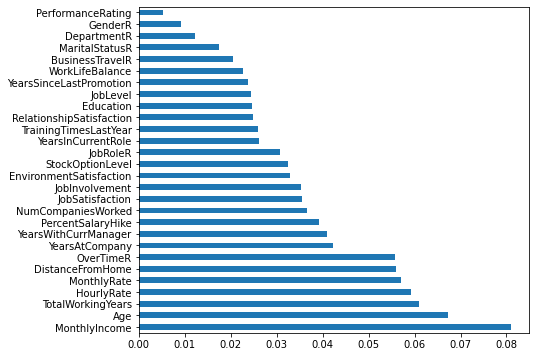

In [37]:
feature_importances.plot(kind='barh', figsize=(7,6))

# Conclusions:
1. We can predict, with our model, whether an employee will stay with 84% accuracy
2. The best predictors of whether someone will stay are:
    - Monthly Income
    - Age
    - Total Working Years
    - Hourly Rate
    - Monthly Rate
    - Distance from Home
    - OverTime